# Analysis Notebook

Вся выжимка из анализа набора данных при помощи "пристального взгляда" описана в ```README.md```

# Import 

In [3]:
import os

while os.getcwd().split("/")[-1] != "book_counter":
    os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

# Draw some images

In [5]:
def browse_images_slice(start=0, end=10, max_cols=10):
    images_folder = "task_images"
    image_files = [
        f for f in os.listdir(images_folder) if f.endswith((".jpg", ".jpeg", ".png"))
    ]

    image_files.sort(key=lambda x: int(x.split(".")[0]))

    image_files = image_files[start:end]
    n = len(image_files)

    if n == 0:
        print("Нет изображений в указанном диапазоне")
        return

    cols = min(max_cols, n)
    rows = (n + cols - 1) // cols

    fig_width = min(20, cols * 3)
    fig_height = rows * 3

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)

    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            if index < n:
                img_path = os.path.join(images_folder, image_files[index])

                with Image.open(img_path) as img:
                    width, height = img.size

                img_display = mpimg.imread(img_path)

                axes[i, j].imshow(img_display)
                axes[i, j].set_title(
                    f"{image_files[index]}\n{width}x{height}", fontsize=8, pad=2
                )
                axes[i, j].axis("off")
            else:
                axes[i, j].axis("off")

    plt.show()

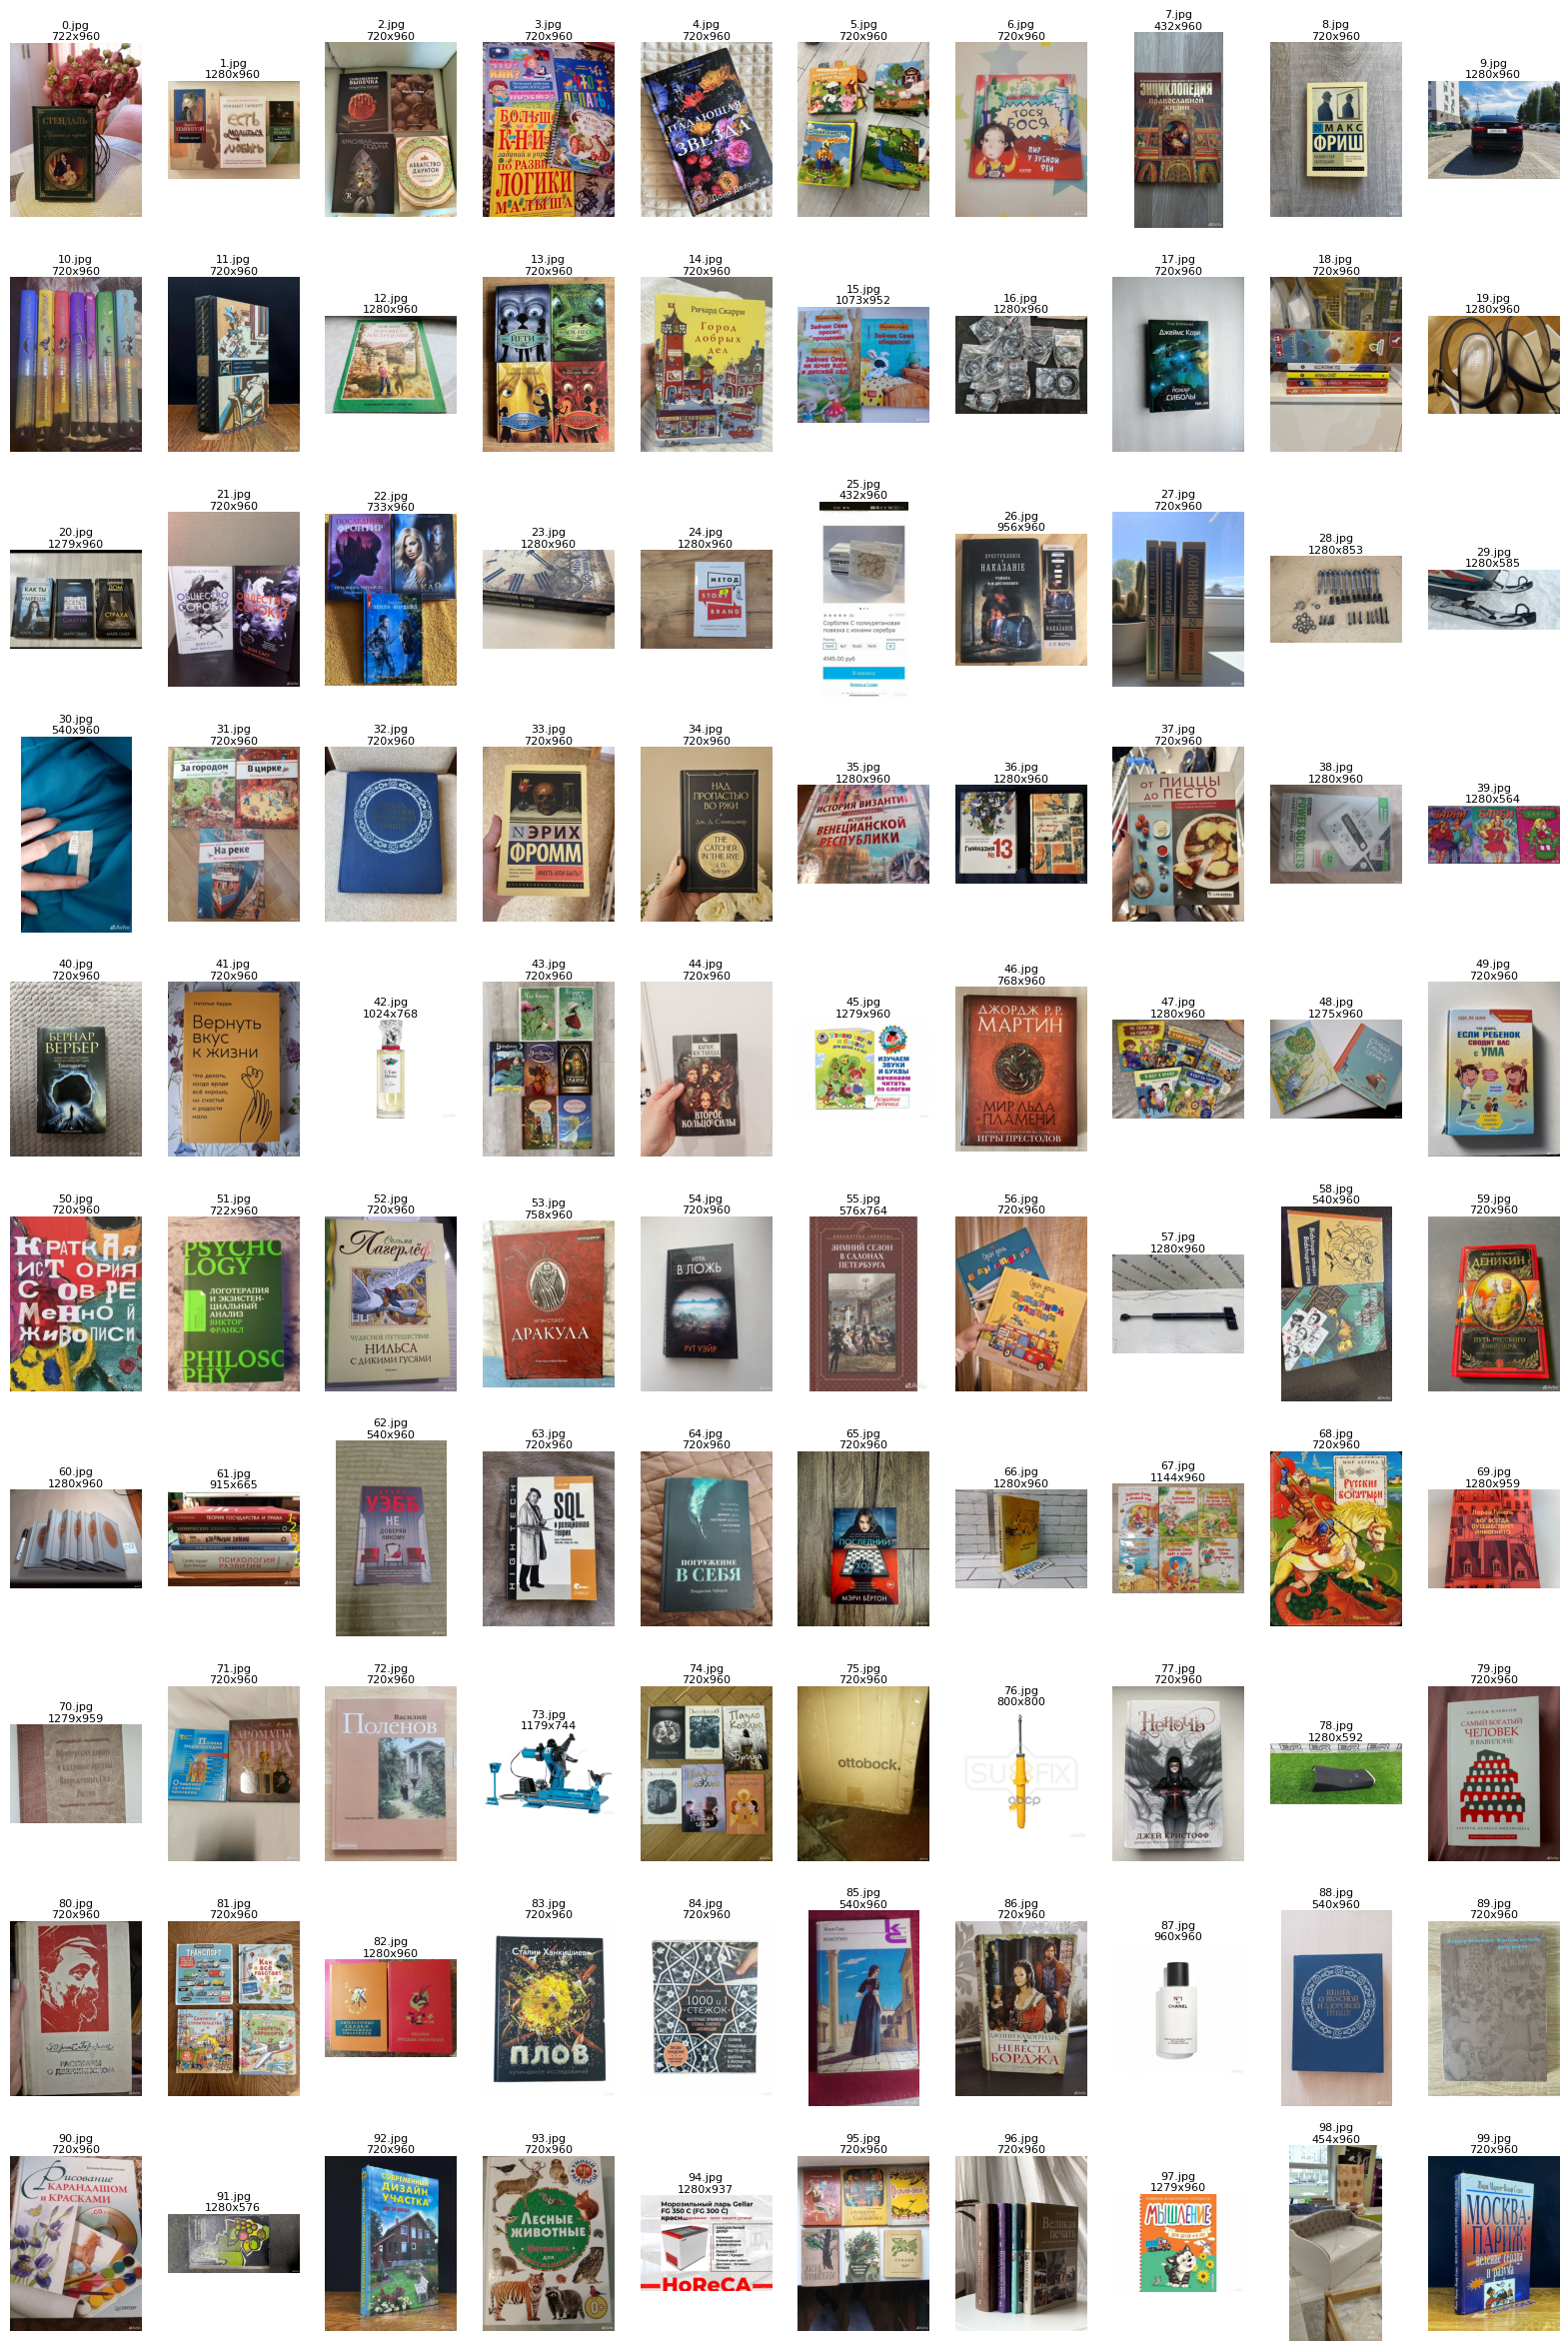

In [6]:
browse_images_slice(0, 100, max_cols=10)